In [1]:
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import TruncatedSVD

In [2]:
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

In [3]:
#train_data1 = np.loadtxt("mnist_train.csv",delimiter=",")
#test_data1 = np.loadtxt("mnist_test.csv",delimiter=",")

In [4]:
#train_data1

In [5]:
train_data.head()

,Label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#train_data1.shape

In [7]:
y_train = train_data.loc[:,'Label'].values
x_train = train_data.loc[:,'0':].values

In [8]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x_train)
print(standardized_data.shape)

(60000, 784)


In [9]:
## Importing and Apply SVD

svd = TruncatedSVD(n_components=2) # project from 784 to 2 dimensions
principalComponents = svd.fit_transform(x_train)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape

(60000, 2)

In [10]:
# Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(svd.explained_variance_ratio_))

Explained variation per principal component: [0.05807749 0.08246404]


Text(0, 0.5, 'Principal Component 2')

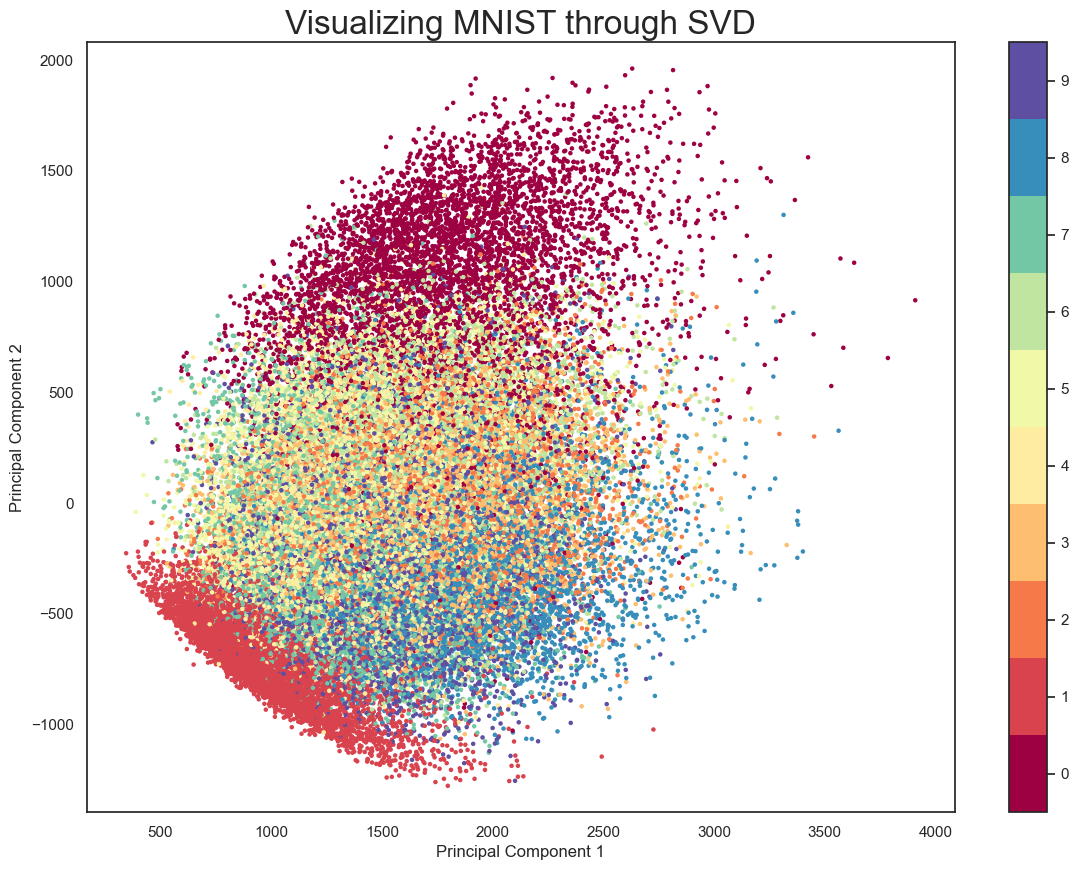

In [11]:
# Plot the first two principal components of each point to learn about the data:

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=y_train, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST through SVD', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [12]:

svd = TruncatedSVD(n_components=3) # project from 784 to 2 dimensions
principalComponents = svd.fit_transform(x_train)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df.shape

(60000, 3)

In [13]:
print('variation per principal component: {}'.format(svd.explained_variance_ratio_))

variation per principal component: [0.05807749 0.08246404 0.07095205]


In [14]:
svd = TruncatedSVD(n_components=250, n_iter=7, random_state=42)
svd.fit(x_train)

TruncatedSVD(n_components=250, n_iter=7, random_state=42)

In [15]:
print ("Overall Variance: ")
print(svd.explained_variance_ratio_.sum())

Overall Variance: 
0.978027473803793


Variance - Principal Component


Text(0, 0.5, 'variance ratio')

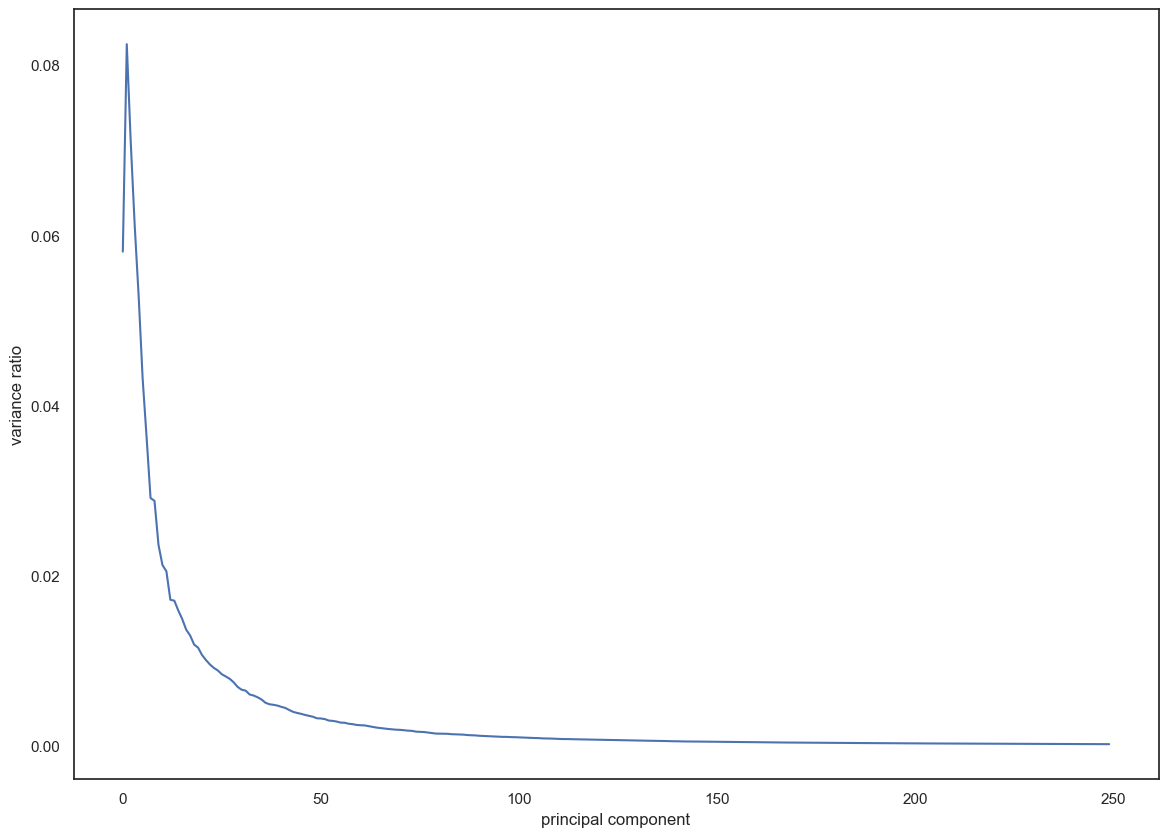

In [16]:
var_ratios = svd.explained_variance_ratio_ 
print ("Variance - Principal Component")
plt.plot(var_ratios, ) 
plt.xlabel("principal component") 
plt.ylabel("variance ratio")

In [17]:
y_test = test_data.loc[:,'Label'].values
x_test = test_data.loc[:,'0':].values

In [18]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x_test)
print(standardized_data.shape)

(10000, 784)


In [19]:
sx_train = svd.transform(x_train)
sx_test = svd.transform(x_test)

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(x_train, y_train)
print ("Accuracy on MNIST test dataset with Naive Bayes: ", accuracy_score(y_test, clf.predict(x_test)))

clf.fit(sx_train, y_train)
print ("Accuracy on MNIST test dataset with Naive Bayes and Dimensions reduced: ", accuracy_score(y_test, clf.predict(sx_test)))

Accuracy on MNIST test dataset with Naive Bayes:  0.5558
Accuracy on MNIST test dataset with Naive Bayes and Dimensions reduced:  0.8499


In [22]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
print ("Accuracy on MNIST test dataset with K-NN: ", accuracy_score(y_test, clf.predict(x_test)))

clf.fit(sx_train, y_train)
print ("Accuracy on MNIST test dataset with K-NN with Dimensionally reduced data: ", accuracy_score(y_test, clf.predict(sx_test)))

/Users/samcarey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy on MNIST test dataset with K-NN:  0.9688
Accuracy on MNIST test dataset with K-NN with Dimensionally reduced data:  0.9695


/Users/samcarey/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
from sklearn.linear_model import LogisticRegression
lRegres = LogisticRegression()
lRegres.fit(x_train, y_train)
y_preds_logistic = lRegres.predict(x_test)  
print("Accuracy for Logistic Regression with MNIST test data: ", accuracy_score(y_test, y_preds_logistic))
lRegres.fit(sx_train, y_train)
y_preds_logistic_transform = lRegres.predict(sx_test)
print("Accuracy for Logistic Regression with Dimensionally reduced data: ", accuracy_score(y_test, y_preds_logistic_transform))

/Users/samcarey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Logistic Regression with MNIST test data:  0.9255
Accuracy for Logistic Regression with Dimensionally reduced data:  0.9243


/Users/samcarey/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
